In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [33]:
import pandas as pd
import numpy as np
iris_nparray = iris.data
iris_dataframe = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_dataframe['group'] = pd.Series([iris.target_names[k] for k in iris.target], dtype = "category")

In [5]:
print(iris_dataframe)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         group  
0       se

In [4]:
print(iris_dataframe.mean(numeric_only = True))

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


In [7]:
print(iris_dataframe.median(numeric_only = True))

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64


In [8]:
print(iris_dataframe.std())

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


C:\Users\Mayur\AppData\Local\Temp\ipykernel_13268\3250199637.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(iris_dataframe.std())


In [9]:
print(iris_dataframe.max(numeric_only = True) - iris_dataframe.min(numeric_only = True))

sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
dtype: float64


In [10]:
print(iris_dataframe.quantile([0, 0.25, 0.50, 0.75, 1]))

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.00                4.3               2.0               1.00               0.1
0.25                5.1               2.8               1.60               0.3
0.50                5.8               3.0               4.35               1.3
0.75                6.4               3.3               5.10               1.8
1.00                7.9               4.4               6.90               2.5


C:\Users\Mayur\AppData\Local\Temp\ipykernel_13268\3660263740.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(iris_dataframe.quantile([0, 0.25, 0.50, 0.75, 1]))


In [13]:
from scipy.stats import skew, skewtest
va = iris_dataframe['petal length (cm)']
s = skew(va)
zscore, pvalue = skewtest(va)
print('skewness %.3f zscore %.3f p-value %.3f' %(s, zscore, pvalue))

skewness -0.272 zscore -1.400 p-value 0.162


In [14]:
from scipy.stats import kurtosis, kurtosistest
va = iris_dataframe['petal length (cm)']
k = kurtosis(va)
zscore, pvalue = kurtosistest(va)
print('kurtosis %.3f zscore %.3f p-value %.3f' %(s, zscore, pvalue))

kurtosis -0.272 zscore -14.823 p-value 0.000


In [16]:
print(iris_dataframe['group'].value_counts())

setosa        50
versicolor    50
virginica     50
Name: group, dtype: int64


In [20]:
pcts = [0, .25, .5, .75, 1]
iris_binned = pd.concat(
[pd.qcut(iris_dataframe.iloc[:,0], pcts, precision=1),
pd.qcut(iris_dataframe.iloc[:,1], pcts, precision=1),
pd.qcut(iris_dataframe.iloc[:,2], pcts, precision=1),
pd.qcut(iris_dataframe.iloc[:,3], pcts, precision=1)],
join='outer', axis = 1)
print(iris_binned['petal length (cm)'].value_counts())

(0.9, 1.6]    44
(4.4, 5.1]    41
(5.1, 6.9]    34
(1.6, 4.4]    31
Name: petal length (cm), dtype: int64


In [21]:
print(iris_binned.describe())

       sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
count                150              150               150              150
unique                 4                4                 4                4
top           (4.2, 5.1]       (1.9, 2.8]        (0.9, 1.6]       (0.0, 0.3]
freq                  41               47                44               41


In [23]:
print(pd.crosstab(iris_dataframe['group'], iris_binned['petal length (cm)']))

petal length (cm)  (0.9, 1.6]  (1.6, 4.4]  (4.4, 5.1]  (5.1, 6.9]
group                                                            
setosa                     44           6           0           0
versicolor                  0          25          25           0
virginica                   0           0          16          34


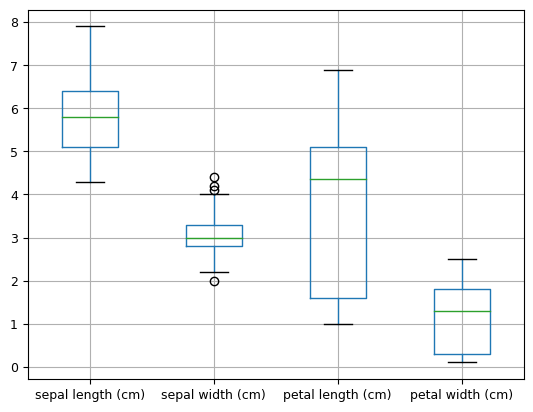

In [24]:
boxplots = iris_dataframe.boxplot(fontsize = 9)

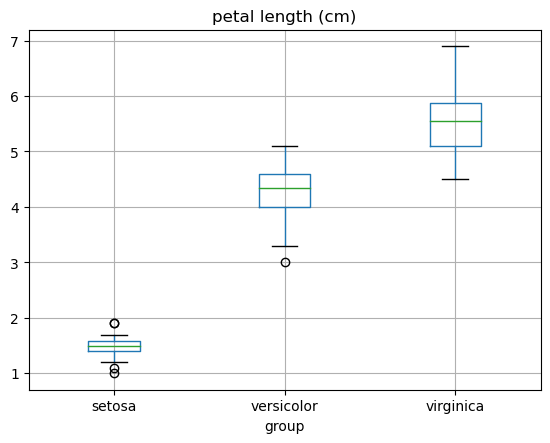

In [25]:
import matplotlib.pyplot as plt
boxplots = iris_dataframe.boxplot(column = 'petal length (cm)', by = 'group', fontsize = 10)
plt.suptitle("")
plt.show()

In [26]:
from scipy.stats import ttest_ind
group0 = iris_dataframe['group'] == 'setosa'
group1 = iris_dataframe['group'] == 'versicolor'
group2 = iris_dataframe['group'] == 'virginica'
va = iris_dataframe['petal length (cm)']
print('var1 %0.3f var2 %0.3f' % (va[group1].var(), va[group2].var()))

var1 0.221 var2 0.305


In [28]:
va = iris_dataframe['sepal width (cm)']
t, pvalue = ttest_ind(va[group1], va[group2], axis = 0, equal_var = False)
print('t statistic %0.3f p-values %0.3f' %(t, pvalue))

t statistic -3.206 p-values 0.002


In [29]:
from scipy.stats import f_oneway
variable = iris_dataframe['sepal width (cm)']
f, pvalue = f_oneway(variable[group0],
variable[group1],
variable[group2])
print('One-way ANOVA F-value %0.3f p-value %0.3f'% (f,pvalue))

One-way ANOVA F-value 49.160 p-value 0.000


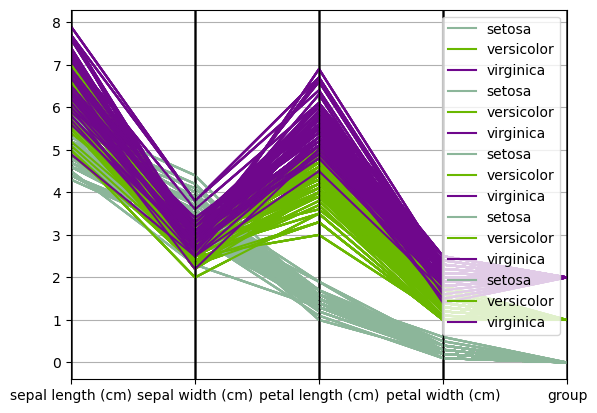

In [38]:
from pandas.plotting import parallel_coordinates
iris_dataframe['group'] = iris.target
iris_dataframe['labels'] = [iris.target_names[k] for k in iris_dataframe['group']]
pll = parallel_coordinates(iris_dataframe, 'labels')
plt.show()

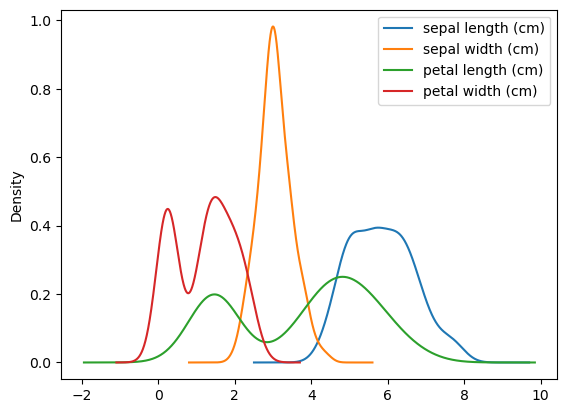

In [46]:
cols = iris_dataframe.columns[:4]
densityplot = iris_dataframe[cols].plot(kind='density')
plt.show()

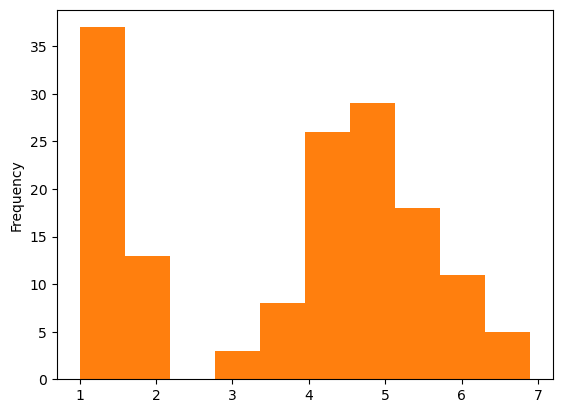

In [48]:
variable = iris_dataframe['petal length (cm)']
single_distribution = variable.plot(kind='hist')
plt.show()

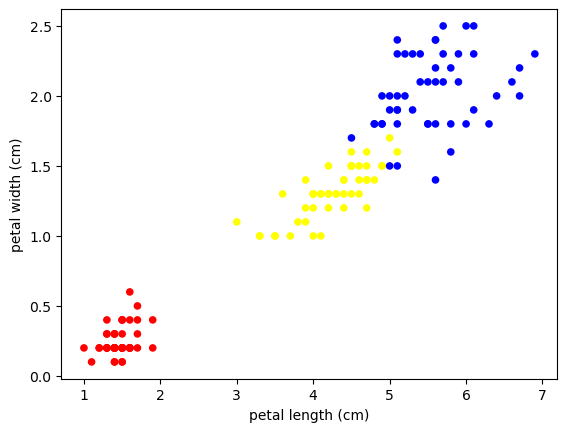

In [51]:
palette = {0: 'red', 1: 'yellow', 2:'blue'}
colors = [palette[c] for c in iris_dataframe['group']]
simple_scatterplot = iris_dataframe.plot(
kind='scatter', x='petal length (cm)',
y='petal width (cm)', c=colors)
plt.show()

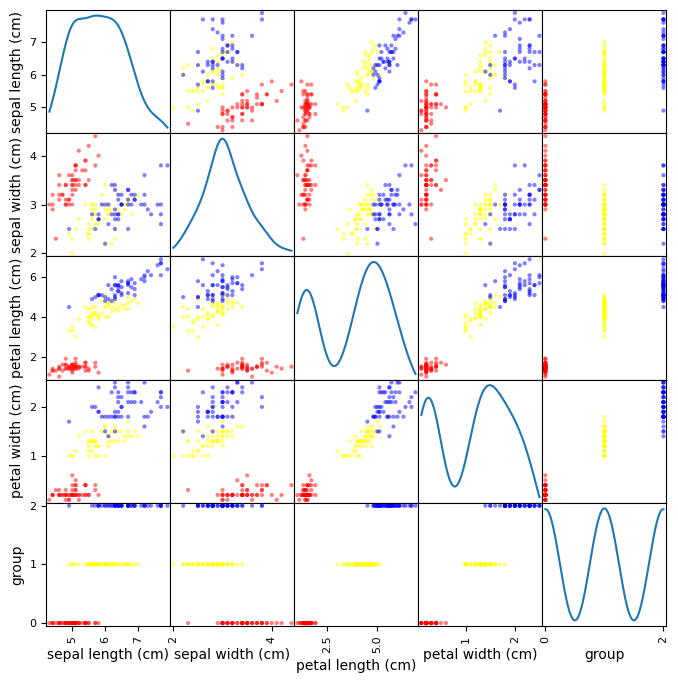

In [55]:
from pandas.plotting import scatter_matrix
palette = {0: "red", 1: "yellow", 2: "blue"}
colors = [palette[c] for c in iris_dataframe['group']]
matrix_of_scatterplots = scatter_matrix(
iris_dataframe, figsize=(8, 8),
color=colors, diagonal='kde')
plt.show()

In [56]:
iris_dataframe.cov()

C:\Users\Mayur\AppData\Local\Temp\ipykernel_13268\550850631.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_dataframe.cov()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
sepal length (cm),0.685694,-0.042434,1.274315,0.516271,0.530872
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639,-0.152349
petal length (cm),1.274315,-0.329656,3.116278,1.295609,1.372483
petal width (cm),0.516271,-0.121639,1.295609,0.581006,0.597315
group,0.530872,-0.152349,1.372483,0.597315,0.671141


In [57]:
iris_dataframe.corr()

C:\Users\Mayur\AppData\Local\Temp\ipykernel_13268\4266267480.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_dataframe.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
group,0.782561,-0.426658,0.949035,0.956547,1.000000


In [58]:
covariance_matrix = np.cov(iris_nparray, rowvar=0)
correlation_matrix = np.corrcoef(iris_nparray, rowvar=0)

In [59]:
from scipy.stats import spearmanr
from scipy.stats.stats import pearsonr
a = iris_dataframe['sepal length (cm)']
b = iris_dataframe['sepal width (cm)']
rho_coef, rho_p = spearmanr(a, b)
r_coef, r_p = pearsonr(a, b)
print('Pearson r %0.3f | Spearman rho %0.3f'
% (r_coef, rho_coef))

Pearson r -0.118 | Spearman rho -0.167


C:\Users\Mayur\AppData\Local\Temp\ipykernel_13268\3569814363.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [60]:
from scipy.stats import chi2_contingency
table = pd.crosstab(iris_dataframe['group'],
iris_binned['petal length (cm)'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square %0.2f p-value %0.3f' % (chi2, p))

Chi-square 212.43 p-value 0.000


In [61]:
from sklearn.preprocessing import scale
variable = iris_dataframe['sepal width (cm)']
stand_sepal_width = scale(variable)

In [62]:
from scipy.stats.stats import pearsonr
tranformations = {'x': lambda x: x,
'1/x': lambda x: 1/x,
'x**2': lambda x: x**2,
'x**3': lambda x: x**3,
'log(x)': lambda x: np.log(x)}
a = iris_dataframe['sepal length (cm)']
b = iris_dataframe['sepal width (cm)']
for transformation in tranformations:
  b_transformed = tranformations[transformation](b)
  pearsonr_coef, pearsonr_p = pearsonr(a, b_transformed)
  print('Transformation: %s \t Pearson\'s r: %0.3f'% (transformation, pearsonr_coef))

Transformation: x 	 Pearson's r: -0.118
Transformation: 1/x 	 Pearson's r: 0.080
Transformation: x**2 	 Pearson's r: -0.131
Transformation: x**3 	 Pearson's r: -0.140
Transformation: log(x) 	 Pearson's r: -0.100


C:\Users\Mayur\AppData\Local\Temp\ipykernel_13268\106850078.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
